In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df =pd.read_csv('daily-total-female-births.csv',header=0,index_col=0)
df


,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [10]:
df.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [11]:
df.size


365

In [12]:
df.describe()

,Births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


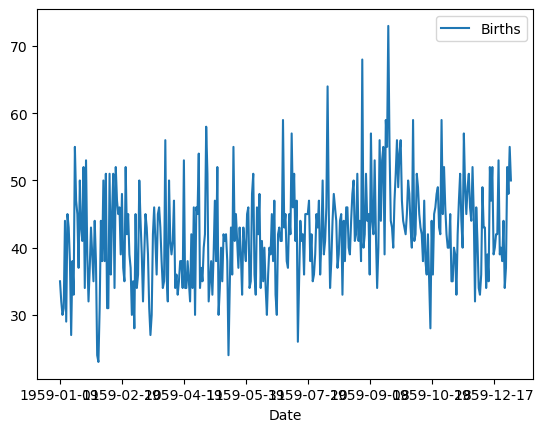

In [13]:
df.plot()
plt.show()

<Axes: ylabel='Density'>

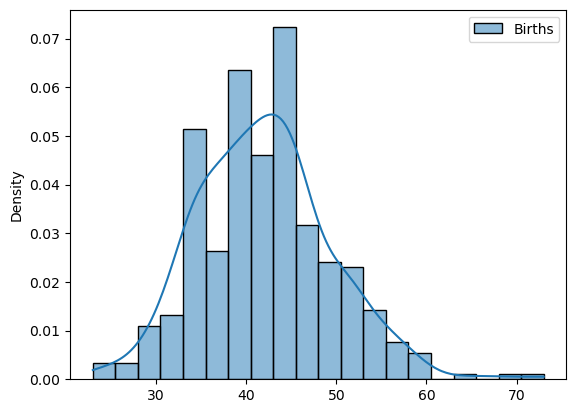

In [43]:
sns.histplot(df, kde=True, stat="density")

In [14]:
from pandas import DataFrame
from pandas import concat
values = DataFrame(df.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
result = dataframe.corr()
print(result)


            t       t+1
t    1.000000  0.217877
t+1  0.217877  1.000000


In [15]:
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
predictions = [x for x in test_X]

In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
print(residuals.head())

Test RMSE: 9.151
      0
0   9.0
1 -10.0
2   3.0
3  -6.0
4  30.0


In [21]:
from statsmodels.tsa.ar_model import AutoReg

train_resid = [train_y[i]-predictions[i] for i in range(len(predictions))]
lags=15
model = AutoReg(train_resid,lags=15)
model_fit = model.fit()
num_lags = len(model_fit.params) - 1

window = num_lags

coef = model_fit.params
print('Lag=%d, Coef=%s' % (window, coef))


Lag=15, Coef=[-4.66193272e+00  5.73701968e-02  1.43171026e-01  9.68337959e-02
  5.10649447e-02  2.92227566e-02  1.78311332e-02  1.03256063e-01
 -1.16839479e-01 -1.94917149e-01 -3.38391427e-02  1.18924773e-01
 -3.98976984e-03 -1.35830448e-01  3.33477591e-02 -8.91723708e-02]


predicted error=-8.161705, expected error=9.000000
predicted error=-15.830279, expected error=-10.000000
predicted error=-5.628699, expected error=3.000000
predicted error=-0.067931, expected error=-6.000000
predicted error=-6.089808, expected error=30.000000
predicted error=-5.502384, expected error=-28.000000
predicted error=0.096119, expected error=2.000000
predicted error=-1.213463, expected error=9.000000
predicted error=-9.339531, expected error=-7.000000
predicted error=-4.273750, expected error=1.000000
predicted error=-2.632401, expected error=-9.000000
predicted error=-0.539878, expected error=21.000000
predicted error=-8.780387, expected error=-13.000000
predicted error=-5.722167, expected error=-2.000000
predicted error=1.624860, expected error=11.000000
predicted error=-3.917376, expected error=-11.000000
predicted error=-6.666075, expected error=-8.000000
predicted error=-9.917406, expected error=6.000000
predicted error=3.406165, expected error=16.000000
predicted error=

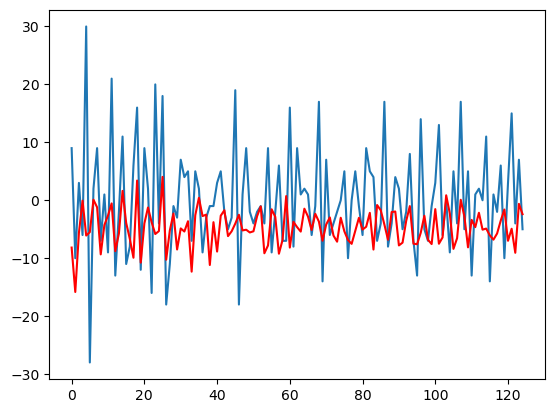

<Figure size 2000x400 with 0 Axes>

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error

# Assuming you have defined 'window', 'test_X', 'test_y', 'train_resid', and 'coef' appropriately

history = train_resid[len(train_resid) - window:]
predictions = []
expected_error = []

for t in range(len(test_y)):
    Y = test_X[t]
    error = test_y[t] - Y
    expected_error.append(error)
    length = len(history)
    lag = [history[i] for i in range(length - window, length)]
    pred_error = coef[0]

    for d in range(window):
        pred_error += coef[d+1] * lag[window - d - 1]

    predictions.append(pred_error)
    history.append(error)
    print('predicted error=%f, expected error=%f' % (pred_error, error))

rmse = sqrt(mean_squared_error(expected_error, predictions))
print('Test RMSE: %.3f' % rmse)

plt.plot(expected_error)
plt.plot(predictions, color='red')
plt.figure(figsize=(20, 4))
plt.show()


predicted=54.240248, expected=42.000000
predicted=38.195485, expected=34.000000
predicted=17.983020, expected=40.000000
predicted=28.952769, expected=56.000000
predicted=38.014505, expected=44.000000
predicted=24.686198, expected=53.000000
predicted=34.702989, expected=55.000000
predicted=31.867537, expected=39.000000
predicted=20.939537, expected=59.000000
predicted=49.952196, expected=55.000000
predicted=53.305975, expected=73.000000
predicted=55.289282, expected=55.000000
predicted=40.464710, expected=44.000000
predicted=39.182152, expected=43.000000
predicted=30.760288, expected=40.000000
predicted=35.141494, expected=47.000000
predicted=41.606109, expected=51.000000
predicted=47.385255, expected=56.000000
predicted=43.677864, expected=49.000000
predicted=46.426632, expected=54.000000
predicted=54.425535, expected=56.000000
predicted=53.276212, expected=47.000000
predicted=44.517262, expected=44.000000
predicted=32.826601, expected=43.000000
predicted=39.215985, expected=42.000000


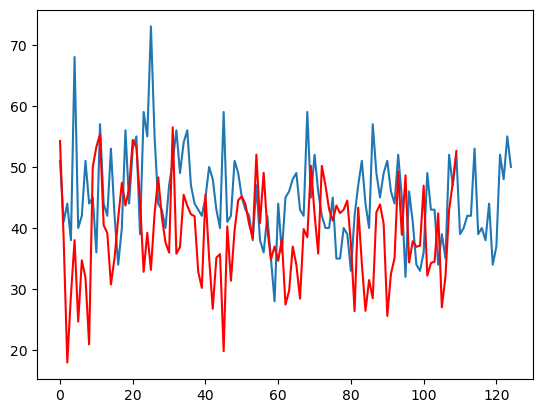

In [39]:
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



predictions = []
history = list(test_y[:window])  # Initialize history with initial samples

for t in range(window, len(test_y)):
    Y = test_X[t]
    error = test_y[t] - Y
    lag = history[t - window : t]  # Select the appropriate lag values
    pred_error = coef[0]
    
    for d in range(window):
        pred_error += coef[d+1] * lag[window - d - 1]
        
    Y = Y + pred_error
    predictions.append(Y)
    history.append(error)
    
    print('predicted=%f, expected=%f' % (Y, test_y[t]))

rmse = sqrt(mean_squared_error(test_y[window:], predictions))
print('Test RMSE: %.3f' % rmse)

plt.plot(test_y)
plt.plot(predictions, color='red')
plt.show()
